<div style="text-align: center">
<b><font size=6>ChEn 3603 Homework 6 Problem 1
    </font></b>
</div>

<div class="alert alert-block alert-danger">

&copy; 2020 This material is copyright protected. Distributing this material in any form without written permission from Professor Sutherland is prohibited and may result in academic discipline.

Antoine's equation is $$\log(p_{sat}) = A - \frac{B}{T+C}$$ with $T$ in C and $p$ in mmHg.  

Antoine coefficients are from [this site](https://www.scribd.com/doc/22857803/Antoine-Coefficient-Table-Scribd-4787907-MT03) and are summarized below:

| Species     | $A$     | $B$      | $C$     | $T_\mathrm{min}$ (C) | $T_\mathrm{max}$ (C)|
|-------------|---------|----------|---------|------------------|------------------|
| $i$-pentane | 6.83315 | 1040.730 | 235.445 | -57 | 49
| $n$-pentane | 6.87632 | 1075.780 | 233.205 | -50 | 58

We will use the antoine function from the class web page.


# Part 1 - plots of saturation pressure


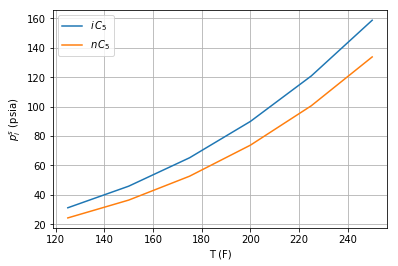

In [1]:
from antoine import antoine
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# order isopentane then n-pentane
antoine_coefs = np.array( [ 
    [6.83315, 1040.730, 235.445],
    [6.87632, 1075.780, 233.205]
    ] )
kvals = np.array( [
    [13.6106,-2345.09,-40.2128],
    [13.9778,-2554.60,-36.2529]
    ])

T_F = np.arange(125,251,25)  # T in F
T_C = (T_F-32)*5/9   # convert to C
p = 760  # atmospheric pressure, mmHg

ps_1 = np.zeros_like(T_F)
ps_2 = np.zeros_like(T_F)

for i in range(0,len(T_C)):
    ps = antoine(antoine_coefs,T_C[i])
    ps_1[i] = ps[0]
    ps_2[i] = ps[1]


plt.plot(T_F,ps_1/760*14.7,label=r'$i\,C_5$')
plt.plot(T_F,ps_2/760*14.7,label=r'$n\,C_5$')
plt.xlabel('T (F)')
plt.ylabel(r'$p_i^s$ (psia)')
plt.legend()
plt.grid()
plt.show()

# Part 2 - plots of relative volatility

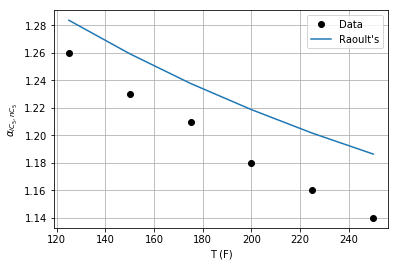

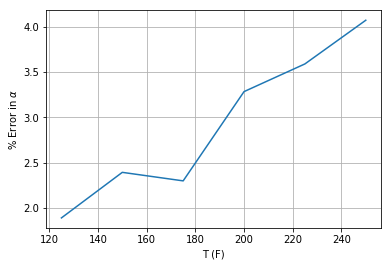

In [2]:
alpha = ps_1/ps_2

alpha_data = [ 1.26,1.23,1.21,1.18,1.16,1.14 ]

plt.plot(T_F,alpha_data,'ko',label='Data')
plt.plot(T_F,alpha,label='Raoult\'s')
plt.xlabel('T (F)')
plt.ylabel(r'$\alpha_{iC_5,nC_5}$')
plt.legend()
plt.grid()
plt.show()

# calcualte a % error
error = (alpha-alpha_data)/alpha_data
plt.plot(T_F,error*100)
plt.xlabel('T (F)')
plt.ylabel(r'% Error in $\alpha$')
plt.grid()
plt.show()

The error in using Raoult's law with the given Antoine parameters is under 4% over the temperature range considered.